# College Major Analysis based on economical factors

## The goal of the analysis is to provide a data model that can help students and parents choose a college major and understand how big a financial difference it makes.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
def load_data(filename):
    """Given a filename of a csv load data into a Pandas dataframe.

        filename - string

        return Pandas dataframe
    """
    return pd.read_csv(filename, encoding='utf-8')

**The dataset files used for this analysis are:**
1. all-ages.csv
2. majors-list.csv
3. women-stem.csv
4. recent-grads.csv
5. grad-students.csv

## DataSet Information
**Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more.
Some columns used in the dataset are:**

* Rank - Rank by median earnings (the dataset is ordered by this column).
* Major_code - Major code.
* Major - Major description.
* Major_category - Category of major.
* Total - Total number of people with major.
* Sample_size - Sample size (unweighted) of full-time.
* Men - Male graduates.
* Women - Female graduates.
* ShareWomen - Women as share of total.
* Employed - Number employed.
* Median - Median salary of full-time, year-round workers.
* Low_wage_jobs - Number in low-wage service jobs.
* Full_time - Number employed 35 hours or more.
* Part_time - Number employed less than 35 hours.


In [3]:
all_ages = 'all-ages.csv'
grad_students = 'grad-students.csv'
majors_list = 'majors-list.csv'
women_stem = 'women-stem.csv'
recent_grads = 'recent-grads.csv'

In [4]:
all_ages_df = load_data(all_ages)
recent_grads_df = load_data(recent_grads)
grad_students_df = load_data(grad_students)
majors_list_df = load_data(majors_list)
women_stem_df = load_data(women_stem)

## Data Cleaning (Removing records with missing values)

**All-ages.csv**

In [5]:
raw_data_count = len(all_ages_df)
print("The dataset have {} number of records before removing missing data.".format(raw_data_count))

#drop records with missing values
all_ages_df.dropna(inplace = True)

#Now again let's check the no. of records we have
cleaned_data_count = len(all_ages_df)
print("The dataset'all-ages.csv' has {} number of records after removing missing data.".format(cleaned_data_count))

The dataset have 173 number of records before removing missing data.
The dataset'all-ages.csv' has 173 number of records after removing missing data.


**Recent-grads.csv**

In [6]:
raw_data_count = len(recent_grads_df)
print("The dataset have {} number of records before removing missing data.".format(raw_data_count))

#drop records with missing values
recent_grads_df.dropna(inplace = True)

#Now again let's check the no. of records we have
cleaned_data_count = len(recent_grads_df)
print("The dataset 'recent-grads.csv' has {} number of records after removing missing data.".format(cleaned_data_count))

The dataset have 173 number of records before removing missing data.
The dataset 'recent-grads.csv' has 172 number of records after removing missing data.


**Grad-students.csv**

In [7]:
raw_data_count = len(grad_students_df)
print("The dataset have {} number of records before removing missing data.".format(raw_data_count))

#drop records with missing values
grad_students_df.dropna(inplace = True)

#Now again let's check the no. of records we have
cleaned_data_count = len(grad_students_df)
print("The dataset 'grad-studets.csv' has {} number of records after removing missing data.".format(cleaned_data_count))

The dataset have 173 number of records before removing missing data.
The dataset 'grad-studets.csv' has 173 number of records after removing missing data.


**Major-list.csv**

In [8]:
raw_data_count = len(majors_list_df)
print("The dataset have {} number of records before removing missing data.".format(raw_data_count))

#drop records with missing values
majors_list_df.dropna(inplace = True)

#Now again let's check the no. of records we have
cleaned_data_count = len(majors_list_df)
print("The dataset 'major-list.csv' has {} number of records after removing missing data.".format(cleaned_data_count))

The dataset have 174 number of records before removing missing data.
The dataset 'major-list.csv' has 173 number of records after removing missing data.


**Women-stem.csv**

In [9]:
raw_data_count = len(women_stem_df)
print("The dataset have {} number of records before removing missing data.".format(raw_data_count))

#drop records with missing values
women_stem_df.dropna(inplace = True)

#Now again let's check the no. of records we have
cleaned_data_count = len(women_stem_df)
print("The dataset 'women-stem.csv' has {} number of records after removing missing data.".format(cleaned_data_count))

The dataset have 76 number of records before removing missing data.
The dataset 'women-stem.csv' has 76 number of records after removing missing data.


In [10]:
all_ages_df.head(10)

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0
5,1105,PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources,79409,63043,51077,2070,0.031791,50000,35000,75000.0
6,1106,SOIL SCIENCE,Agriculture & Natural Resources,6586,4926,4042,264,0.050867,63000,39400,88000.0
7,1199,MISCELLANEOUS AGRICULTURE,Agriculture & Natural Resources,8549,6392,5074,261,0.039230,52000,35000,75000.0
8,1301,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,65238,4736,0.051290,52000,38000,75000.0
9,1302,FORESTRY,Agriculture & Natural Resources,69447,48228,39613,2144,0.042563,58000,40500,80000.0


In [11]:
rows, cols = all_ages_df.shape

print("The number of rows:", rows)
print("The number of columns:", cols)

The number of rows: 173
The number of columns: 11


In [12]:
grad_students_df.head(10)

,Major_code,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,...,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium
0,5601,CONSTRUCTION SERVICES,Industrial Arts & Consumer Services,9173,200,7098,6511,681,0.087543,75000.0,...,86062,73607,62435,3928,0.050661,65000.0,47000,98000.0,0.096320,0.153846
1,6004,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,53864,882,40492,29553,2482,0.057756,60000.0,...,461977,347166,250596,25484,0.068386,48000.0,34000,71000.0,0.104420,0.250000
2,6211,HOSPITALITY MANAGEMENT,Business,24417,437,18368,14784,1465,0.073867,65000.0,...,179335,145597,113579,7409,0.048423,50000.0,35000,75000.0,0.119837,0.300000
3,2201,COSMETOLOGY SERVICES AND CULINARY ARTS,Industrial Arts & Consumer Services,5411,72,3590,2701,316,0.080901,47000.0,...,37575,29738,23249,1661,0.052900,41600.0,29000,60000.0,0.125878,0.129808
4,2001,COMMUNICATION TECHNOLOGIES,Computers & Mathematics,9109,171,7512,5622,466,0.058411,57000.0,...,53819,43163,34231,3389,0.072800,52000.0,36000,78000.0,0.144753,0.096154
5,3201,COURT REPORTING,Law & Public Policy,1542,22,1008,860,0,0.000000,75000.0,...,8921,6967,6063,518,0.069205,50000.0,34000,75000.0,0.147376,0.500000
6,6206,MARKETING AND MARKETING RESEARCH,Business,190996,3738,151570,123045,8324,0.052059,80000.0,...,1029181,817906,662346,45519,0.052719,60000.0,40000,91500.0,0.156531,0.333333
7,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,17488,386,13104,11207,473,0.034838,67000.0,...,89169,71781,61335,1869,0.025377,55000.0,38000,80000.0,0.163965,0.218182
8,2101,COMPUTER PROGRAMMING AND DATA PROCESSING,Computers & Mathematics,5611,98,4716,3981,119,0.024612,85000.0,...,28314,22024,18381,2222,0.091644,60000.0,40000,85000.0,0.165394,0.416667
9,1904,ADVERTISING AND PUBLIC RELATIONS,Communications & Journalism,33928,688,28517,22523,899,0.030562,60000.0,...,163435,127832,100330,8706,0.063762,51000.0,37800,78000.0,0.171907,0.176471


# Analysis and Visualization

### Analysis using a correlation matrix, which is a table showing correlation coefficients between variables.

In [13]:
# Plot Correlation matrix
def plot_CorrMatrix(df, graphWidth, csv_name):
    # dropping the columns with NaN or null values
    df = df.dropna('columns')
    
    # To store columns with more than 1 unique values
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    
    # If number of columns is less than 2
    if df.shape[1] < 2:
        print("Can't plot correlation matrix since number of columns is less than 2")
        return
    
    # df.corr() gets the pairwise correlation of all columns in the dataframe.
    corr = df.corr()
    
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    
    # matshow function is used to display an array as a matrix
    matShow = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(matShow)
    plt.title(f'Correlation Matrix for {csv_name}', fontsize=18)
    plt.show()

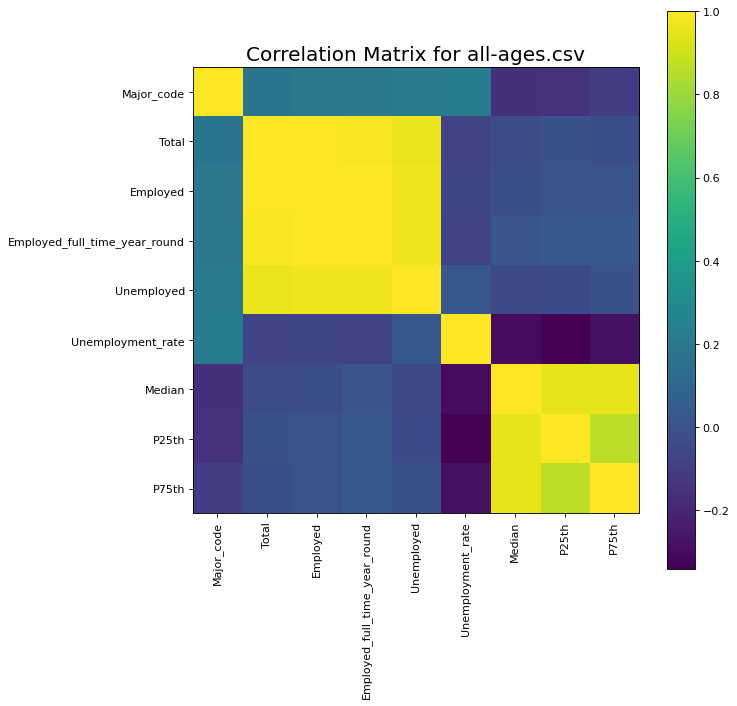

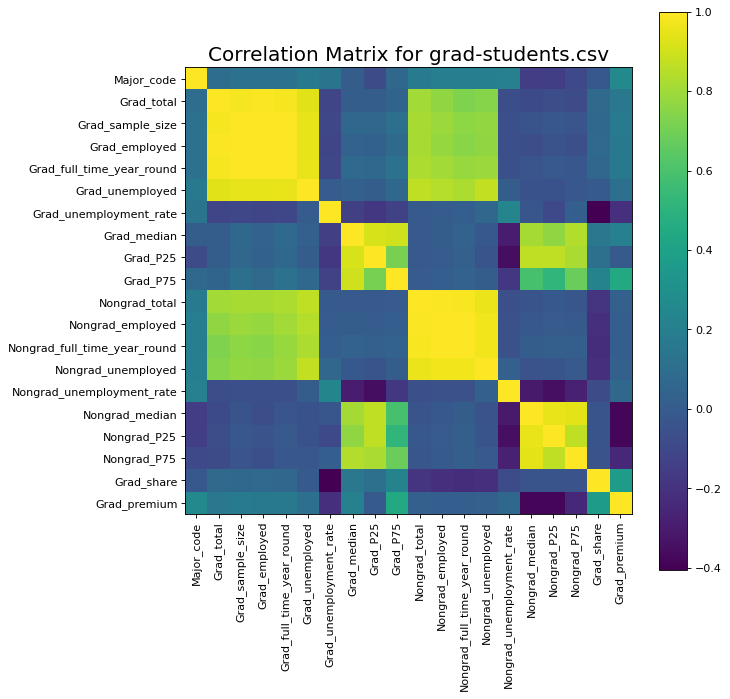

In [14]:
plot_CorrMatrix(all_ages_df, 9, all_ages)
plot_CorrMatrix(grad_students_df, 9, grad_students)

In [15]:
recent_grads_df.head(10)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,264,1449,400,0.177226,65000,50000,102000,1142,657,244
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,...,296,2482,308,0.095652,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,...,553,827,33,0.021167,62000,31500,109000,972,500,220
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.119559,1029,76442,...,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.196450,631,61928,...,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170


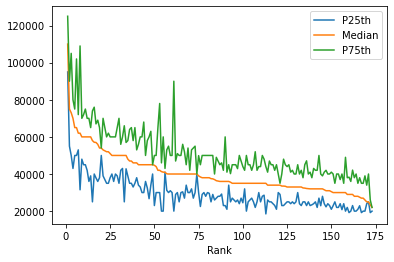

In [16]:
recent_grads_df.plot(x="Rank", y=["P25th", "Median", "P75th"])
plt.show()

### From the above plot, we can make the following observations:
1. **Median income decreases as the rank decreases which is as we expect because the rank is determined by the median income**
2. **Some majors have large gaps between the 25th and 75th percentiles which means that people with those degrees may earn significantly less or significantly more than the mdedian income.**
3. **Rest of the majors have very small gaps between the 25th and 75th percentiles which means that people with those degrees earn a salary very close to the median income.**

In [18]:
recent_grads_df.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


## Creating Scatter plots to analyze the relationships between different columns in the recent_grads dataset

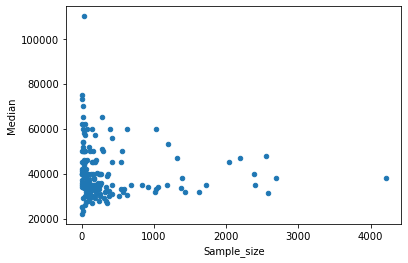

In [22]:
#Sample_Size v/s Median

recent_grads_df.plot(x='Sample_Size', y='Median', kind='scatter')
plt.show()

### From the above scatter plot, we can see that:
1. **The median salaries of full time employees varies greatly in the chunk of lower sample size**
2. **We can't see any linear relation between the sample size and the median salary**

# Data Distribution

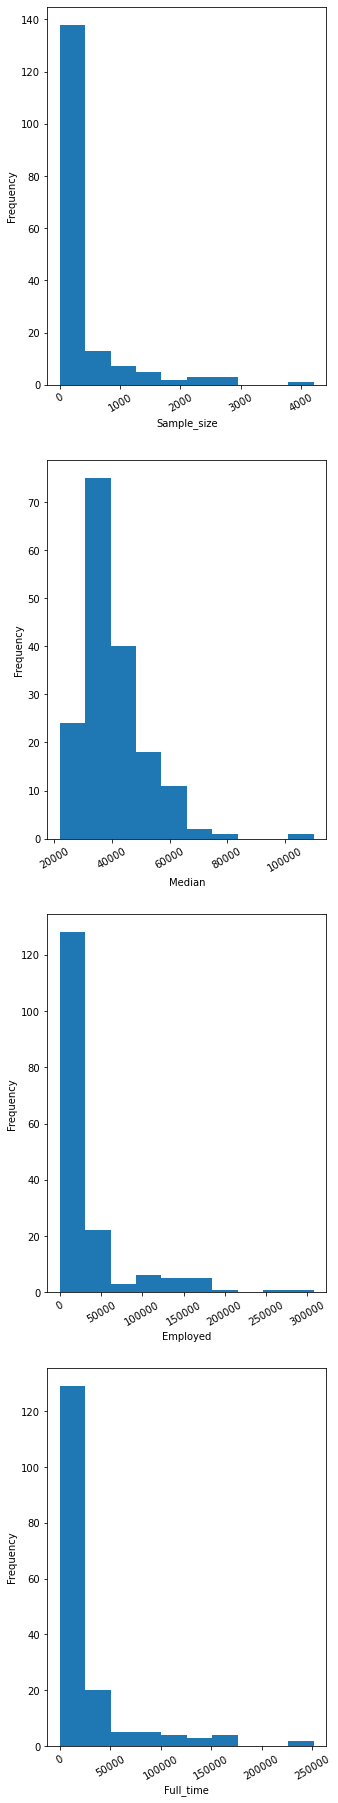

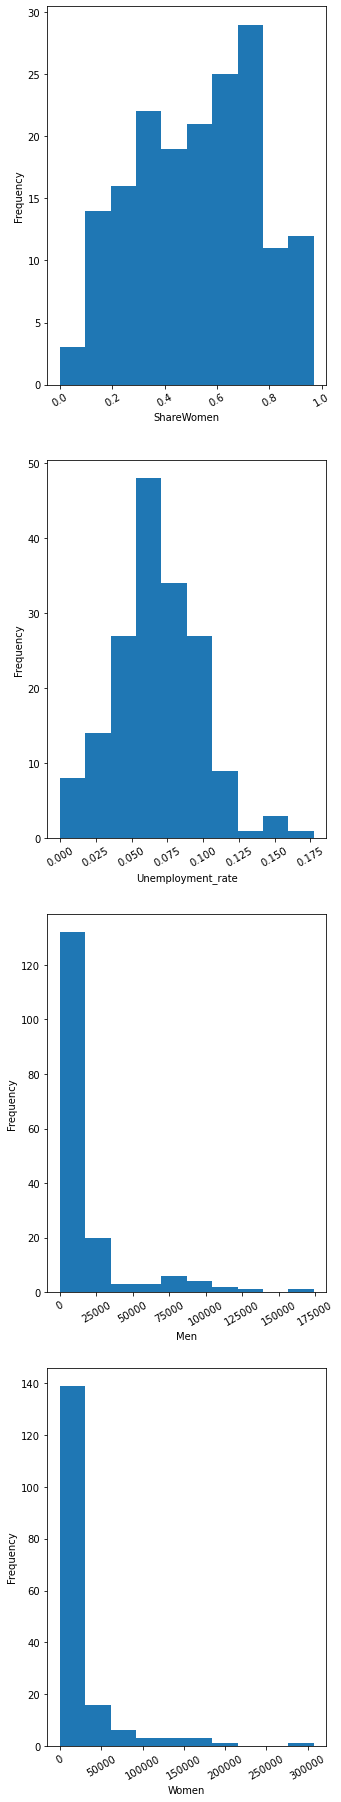

In [42]:
columns = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

# show historgrams with 'Frequency' on the y-axis and the iterates over columns list to set the label on the x-axis
figure = plt.figure(figsize=(5,32))
for i in range(0,4):
    ax = figure.add_subplot(4,1,i+1)
    ax.set_xlabel(columns[i])
    ax = recent_grads_df[columns[i]].plot(kind='hist', rot=30)

figure = plt.figure(figsize=(5,32))
for i in range(4,8):
    ax = figure.add_subplot(4,1,i-3)
    ax.set_xlabel(columns[i])
    ax = recent_grads_df[columns[i]].plot(kind='hist', rot=30)